## Loading Data:

In [1]:
df = read.csv("toy_dataset.csv")

## Gist of dataset:

In [2]:
head(df)

Number,Gender,Age,Income
1,Male,41,40367
2,Male,54,45084
3,Male,42,52483
4,Male,40,40941
5,Male,46,50289
6,Female,36,50786


## Summary:

In [3]:
summary(df)

sum(is.na(df)) #Checking NULL Values
nrow(df)   #Calculating total number of observations
ncol(df)   #Calculating total number of attributes

     Number          Gender           Age            Income      
 Min.   :     1   Female:66200   Min.   :25.00   Min.   :  -654  
 1st Qu.: 37501   Male  :83800   1st Qu.:35.00   1st Qu.: 80868  
 Median : 75001                  Median :45.00   Median : 93655  
 Mean   : 75001                  Mean   :44.95   Mean   : 91253  
 3rd Qu.:112500                  3rd Qu.:55.00   3rd Qu.:104519  
 Max.   :150000                  Max.   :65.00   Max.   :177157  

[1] 0

[1] 150000

[1] 4

## Regression Analysis:

Here we are trying to predict Income(explained variable) of a customer using Age and Gender(explanatory variables). To predict the best fit line we will use Multiple Regression using Ordinary Least Square Method.

### Converting categorical values into dummy values (i.e. 0 and 1):

In [4]:
df$Dummy <- ifelse(df[["Gender"]] == "Male", 1, 0)

#Creating dummy data set:
df_dummy <- df[-2]
head(df_dummy)

Number,Age,Income,Dummy
1,41,40367,1
2,54,45084,1
3,42,52483,1
4,40,40941,1
5,46,50289,1
6,36,50786,0


### Applying Regression on a given data:

In [5]:
model <- lm(Income~Age+Dummy, data = df_dummy)
model
summary(model)


Call:
lm(formula = Income ~ Age + Dummy, data = df_dummy)

Coefficients:
(Intercept)          Age        Dummy  
  85718.403       -1.277    10009.217  



Call:
lm(formula = Income ~ Age + Dummy, data = df_dummy)

Residuals:
   Min     1Q Median     3Q    Max 
-86321  -9179   2565  12323  82762 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 85718.403    263.659 325.111   <2e-16 ***
Age            -1.277      5.464  -0.234    0.815    
Dummy       10009.217    127.349  78.597   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24490 on 149997 degrees of freedom
Multiple R-squared:  0.03956,	Adjusted R-squared:  0.03954 
F-statistic:  3089 on 2 and 149997 DF,  p-value: < 2.2e-16


### Designing Ancova Table:

In [6]:
income_aov <- aov(df_dummy$Income~factor(df_dummy$Age) * factor(df_dummy$Dummy))
summary(income_aov)

                                                Df    Sum Sq   Mean Sq  F value
factor(df_dummy$Age)                            40 2.278e+10 5.695e+08    0.949
factor(df_dummy$Dummy)                           1 3.703e+12 3.703e+12 6173.597
factor(df_dummy$Age):factor(df_dummy$Dummy)     40 1.647e+10 4.117e+08    0.686
Residuals                                   149918 8.993e+13 5.998e+08         
                                            Pr(>F)    
factor(df_dummy$Age)                         0.562    
factor(df_dummy$Dummy)                      <2e-16 ***
factor(df_dummy$Age):factor(df_dummy$Dummy)  0.934    
Residuals                                             
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### Finding residuals:

In [7]:
intercept <- coef(model)[1]
slope_Age <- coef(model)[2]
slope_Dummy <- coef(model)[3]

# Calculate the predicted values
predicted <- intercept + slope_Age * df_dummy$Age + slope_Dummy * df_dummy$Dummy

# Calculate the residuals
residuals <- c(df_dummy$Income - predicted)

## Assumptions of Multiple Regression:

1) The regression model is linear in parameters.

2) Zero mean value of disturbance.

3) Zero covariance between the independent term and disturbance term.

4) Homoscedasticity is present i.e. variance of disturbance term is constant.

5) No autocorrelation between the disturbance terms.

6) No Multicollinearity between explanatory variables.

### Assumption 1: 

Linearity in parameters.

#### Coefficient of Age:

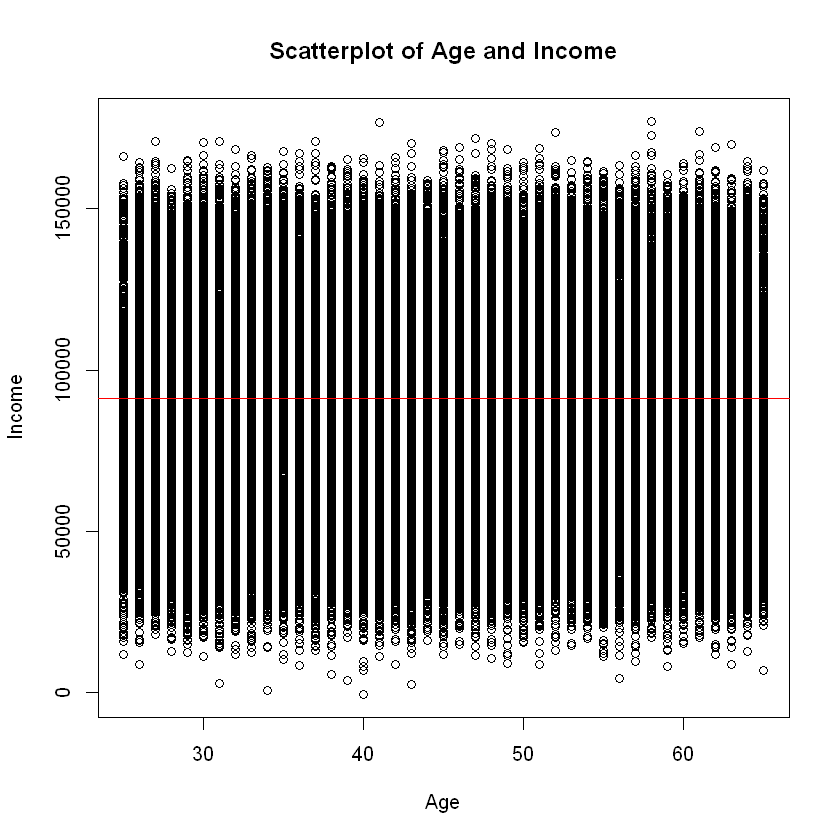

In [17]:
model1 <- lm(df_dummy$Income ~ df_dummy$Age)

# Plot the observed data
plot(df_dummy$Age, df_dummy$Income, xlab = "Age", ylab = "Income", main = "Scatterplot of Age and Income")

# Add a trend line to the plot
abline(model1, col = "red")

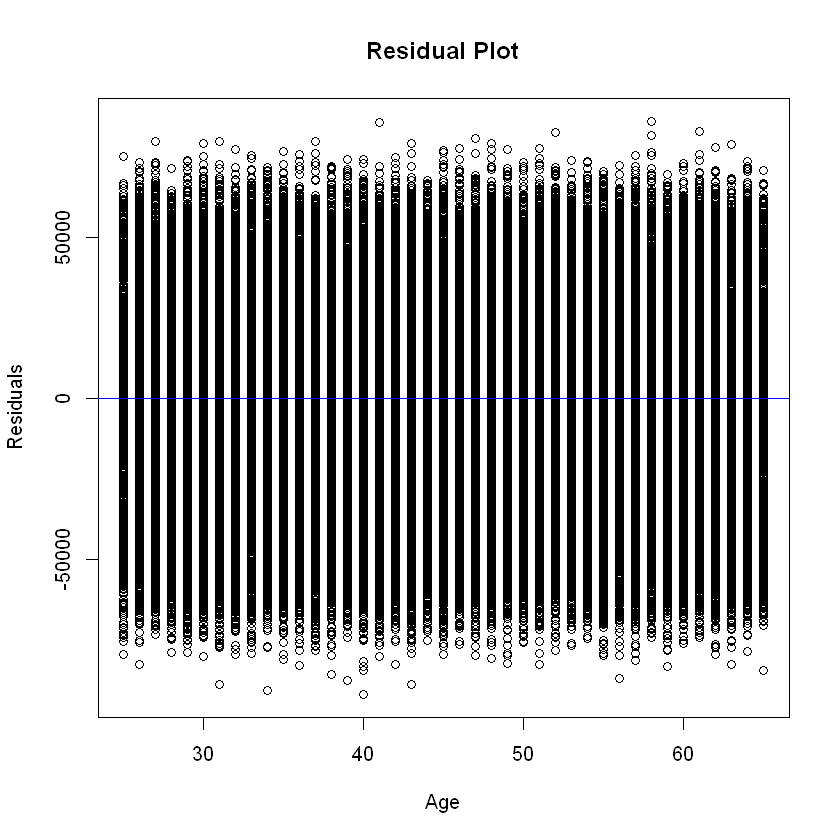

In [19]:
residuals1 <- residuals(model1)
plot(df_dummy$Age, residuals1, xlab = "Age", ylab = "Residuals", main = "Residual Plot")

abline(h = 0, col = "blue")

#### Conclusion:

Here we conclude that the coefficient of Age is Linear in nature.

#### Coefficients of Gender:

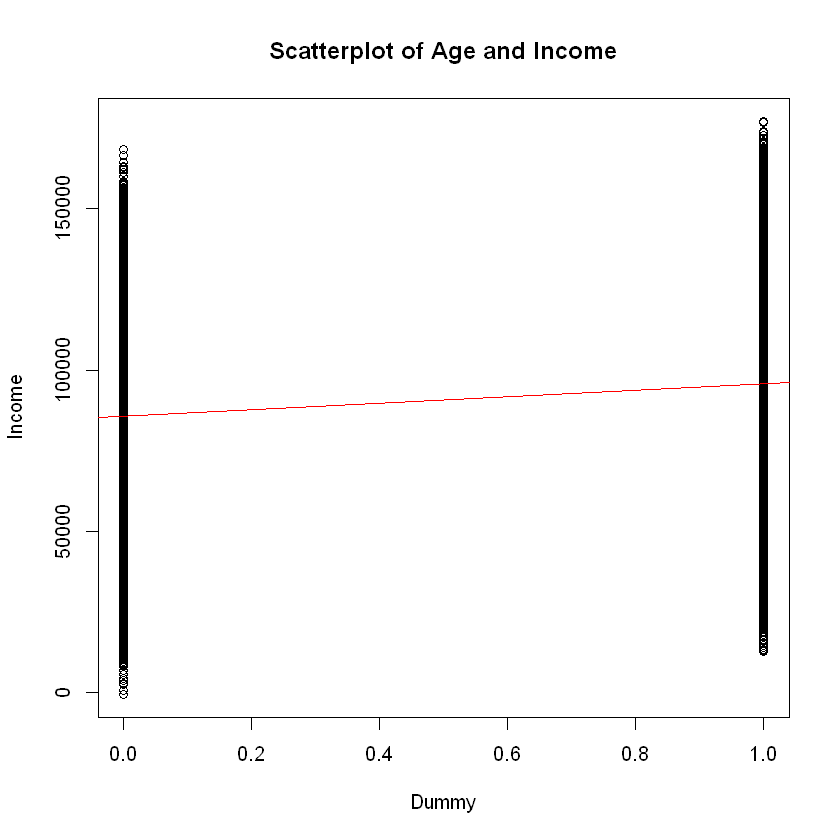

In [20]:
model2 <- lm(df_dummy$Income ~ df_dummy$Dummy)

# Plot the observed data
plot(df_dummy$Dummy, df_dummy$Income, xlab = "Dummy", ylab = "Income", main = "Scatterplot of Age and Income")

# Add a trend line to the plot
abline(model2, col = "red")

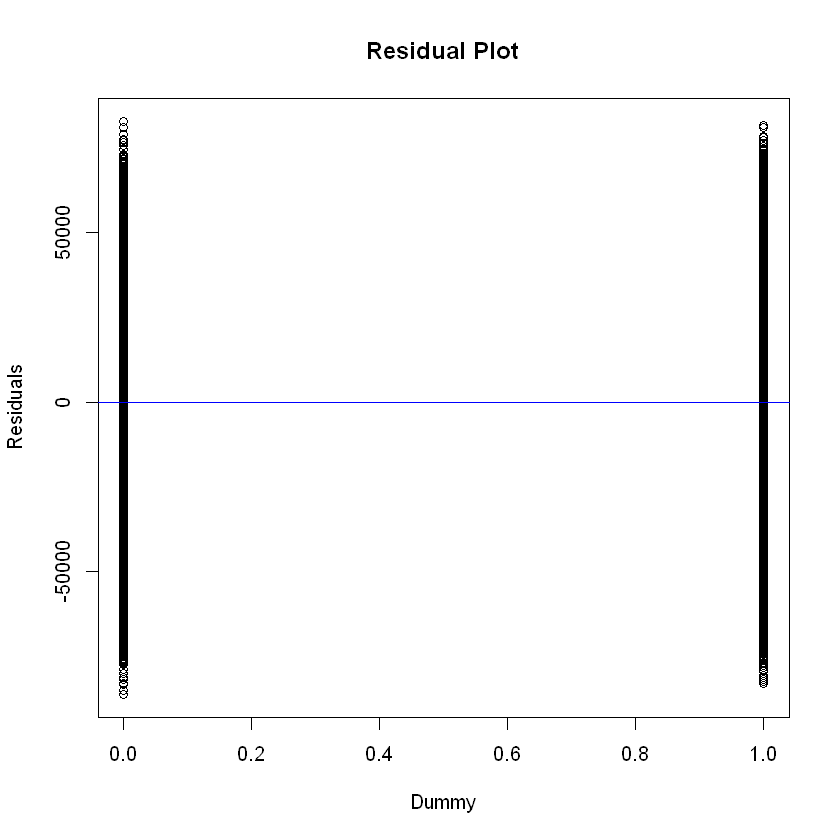

In [21]:
residuals2 <- residuals(model2)
plot(df_dummy$Dummy, residuals2, xlab = "Dummy", ylab = "Residuals", main = "Residual Plot")

abline(h = 0, col = "blue")

#### Conclusion:

Here we conclude that the coefficient of Gender is Linear in nature.

### Assumption 2:

Zero mean value of disturbance.

In [22]:
mean_residuals <- mean(residuals)
mean_residuals

[1] -5.679826e-11

#### Conclusion:

Here the mean value of residuals is near to zero so we conclude that our model has Zero mean value of disturbance.

### Assumption 3:

Zero covariance between the explanatory and the stochastic term.

In [23]:
cov <- cov(df_dummy$Age, residuals)
cov

[1] -6.420808e-11

#### Conclusion:



### Assumption 4:

Homoscedasticity is present.

#### Setting of Hypothesis:

Null Hypothesis,
                Ho:Data is Homoscedastic i.e. the variance of residuals is constant.


Alternative Hypothesis,
                H1:Data is Heteroscedastic i.e. the variance of residuals is not constant.

#### Test Statistic:

Here we use Spearman's Rank Correlation test to check homoscedasticity of the data.

Warning message in cor.test.default(df_dummy$Age, residuals, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  df_dummy$Age and residuals
S = 5.6226e+14, p-value = 0.8704
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
0.0004213143 


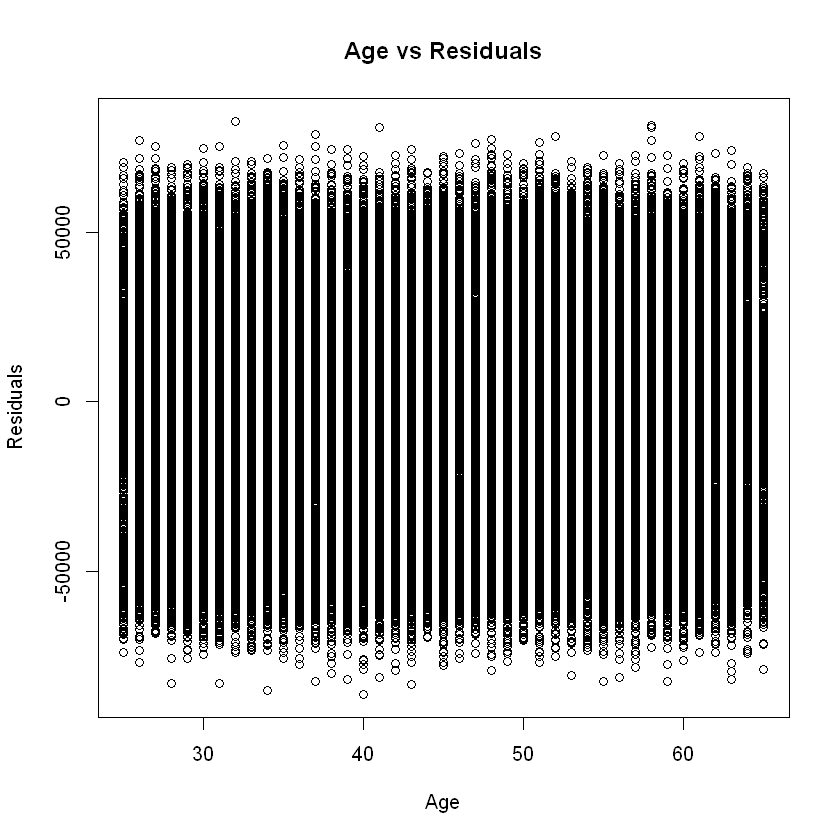

In [24]:
h_age <- cor.test(df_dummy$Age, residuals, method = "spearman")
h_age

plot(df_dummy$Age, residuals, xlab = "Age", ylab = "Residuals", main = "Age vs Residuals")

Warning message in cor.test.default(df_dummy$Dummy, residuals, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  df_dummy$Dummy and residuals
S = 5.6241e+14, p-value = 0.9531
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
0.0001517626 


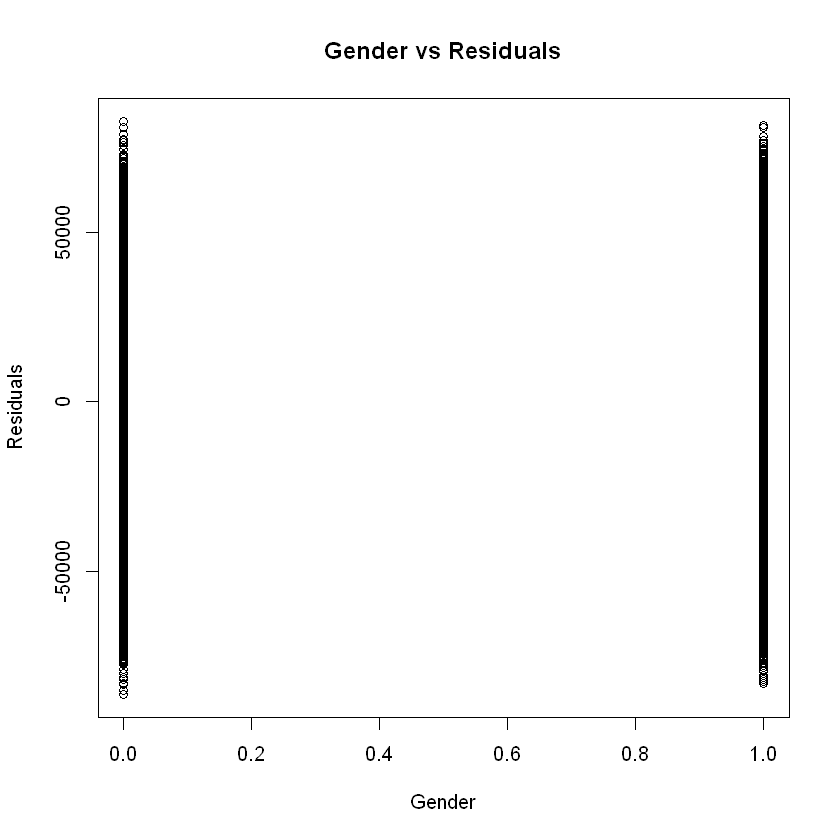

In [25]:
h_dummy <- cor.test(df_dummy$Dummy, residuals, method = "spearman")
h_dummy

plot(df_dummy$Dummy, residuals, xlab = "Gender", ylab = "Residuals", main = "Gender vs Residuals")

#### Decision:

1) p-value of Age is greater than level of signifance i.e. 0.05, so we accept Null Hypothesis.

2) p-value of Dummy is greater than level of signifance i.e. 0.05, so we accept Null Hypothesis.

#### Conclusion:

Hence our data is Homoscedastic in nature.

### Assumption 5:

No Autocorrelation between the residuals.

#### Test Statistic:

Here we use Autocorrelation Function to check whether the Residuals are Autocorrelated or not.

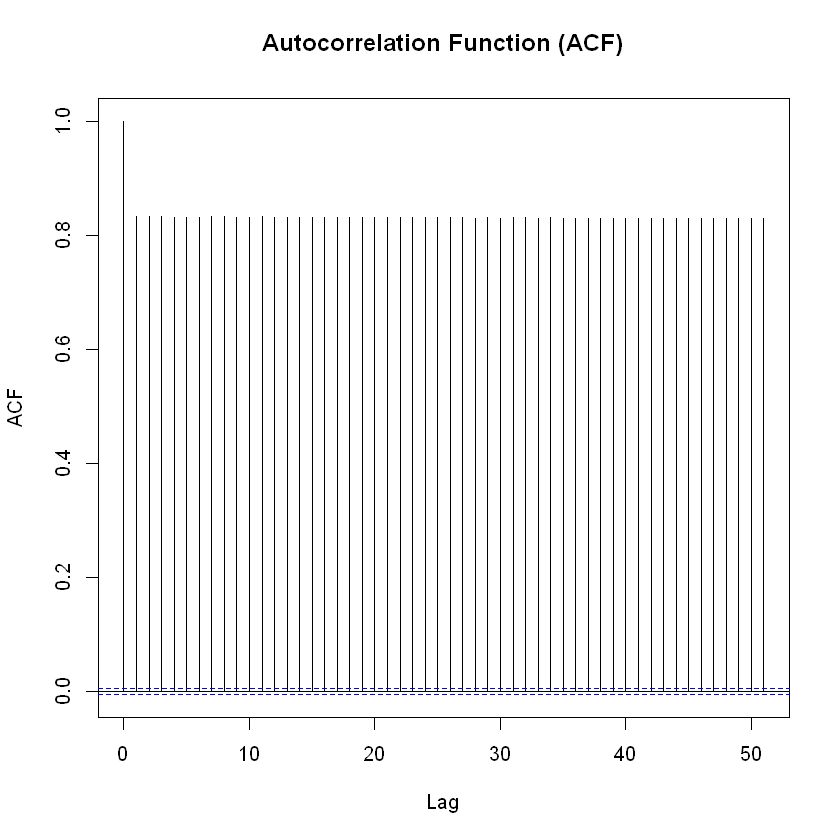

In [26]:
acf(residuals, main = "Autocorrelation Function (ACF)")

#### Decision:

As it is cleary shown from the graph that there is no relation exist between the Residuals i.e. No Autocorrelation is present in our data.

### Assumption 6:

No relation exist between the explanatory variables i.e. No Multicollinearity.

#### Setting of Hypothesis:

Null Hypothesis,
                Ho:No Multicoolinearity i.e. the explanatory variables are orthogonal.


Alternative Hypothesis,
                H1:Multicollinearity is present i.e. the explanatory variables are not orthogonal.

#### Test Statistic:

In [27]:
data <- df_dummy[-1]

cor_matrix <- cor(data)
cor_matrix

determinant <- det(cor_matrix)
determinant

,Age,Income,Dummy
Age,1.000000000,-0.001318114,-0.003653115
Income,-0.001318114,1.000000000,0.198887924
Dummy,-0.003653115,0.198887924,1.000000000


[1] 0.9604304

#### Decision:

Determinant = 0.960430426194121 i.e. near to 1 so we accept Null Hypothesis and conclude that there is No Multicollinearity or explanatory variables are orthogonal.

## Inference:

In [28]:
summary(model)


Call:
lm(formula = Income ~ Age + Dummy, data = df_dummy)

Residuals:
   Min     1Q Median     3Q    Max 
-86321  -9179   2565  12323  82762 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 85718.403    263.659 325.111   <2e-16 ***
Age            -1.277      5.464  -0.234    0.815    
Dummy       10009.217    127.349  78.597   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24490 on 149997 degrees of freedom
Multiple R-squared:  0.03956,	Adjusted R-squared:  0.03954 
F-statistic:  3089 on 2 and 149997 DF,  p-value: < 2.2e-16


## Interpretation:


1) Mean Income = 85718.403

2) Keeping Age constant, If Gender = Male: Income = 95727.62 else if Gender = Female: Income = 85718.403

3) If an Age of a customer changes by 1 year then the change in Income will be equals to -1.277 i.e. If Age = 1 then Income = 85717.126

4) In a above model the p-value of Intercept is less than 0.05, so we conclude that the Intercept term of a customer is significant i.e. there is some relation exist between the Income and a Intercept term. 

5) In a above model the p-value of Dummy is less than 0.05, so we conclude that the Gender term of a customer is significant i.e. there is some relation exist between the Income and a Gender of a customer. 

6) In a above model the p-value of Age is greater than 0.05, so we conclude that the Age of a customer is insignificant i.e. there is no relation exist between the Income and the Age of a customer.

7) Overall the p-value of a model is less than 0.05, so we conclude that our model is significant.

8) R_square = 0.03956 i.e. our model is 3.956% explained.

9) Here we pre determined 5% level of significance which means there are 5% chances that our predicted model is wrong.

## Conclusion:

The model can be interpretated significant as it's overall p-value is less than the level of significance. But we can not use this model for prediction because Age and Gender explains it only 3.956%. 

We can improve model by adding more explanatory variables like years of experience, education, etc.